In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',None)

In [3]:
train_df=pd.read_csv('train.csv',low_memory=False)
test_df=pd.read_csv('test.csv',low_memory=False)
#low_memory=False - is used to load data fastly 

In [4]:
train_df.head()


,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [5]:
train_df['Reached.on.Time_Y.N']=train_df['Reached.on.Time_Y.N'].map({0:'Yes',1:'No'})

In [6]:
train_df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,No
1,2,F,Flight,4,5,216,2,low,M,59,3088,No
2,3,A,Flight,2,2,183,4,low,M,48,3374,No
3,4,B,Flight,3,3,176,4,medium,M,10,1177,No
4,5,C,Flight,2,2,184,3,medium,F,46,2484,No


In [7]:
test_df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,A,Road,3,4,168,3,low,M,5,1841,NaN
1,2,B,Road,5,3,159,2,low,F,58,1990,NaN
2,3,C,Road,2,2,282,3,medium,F,42,3193,NaN
3,4,F,Road,4,3,278,4,high,M,37,3248,NaN
4,5,D,Road,6,4,256,5,low,F,6,3149,NaN


In [8]:
#dropping test_df last column because it has nan values
test_df=test_df.drop('Reached.on.Time_Y.N',axis=1)

#dropping id columns in both data frames because its unique values
test_df=test_df.drop("ID",axis=1)
train_df=train_df.drop("ID",axis=1)

In [9]:
print(train_df.shape)
print(test_df.shape)

(10999, 11)
(3993, 10)


In [10]:
train_df.isnull().sum()

Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [11]:
test_df.isnull().sum()

Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
dtype: int64

In [12]:
test_df.isnull().sum()/test_df.shape[0]  #missing value in percentage

Warehouse_block        0.0
Mode_of_Shipment       0.0
Customer_care_calls    0.0
Customer_rating        0.0
Cost_of_the_Product    0.0
Prior_purchases        0.0
Product_importance     0.0
Gender                 0.0
Discount_offered       0.0
Weight_in_gms          0.0
dtype: float64

In [13]:
train_df.duplicated().sum()

0

In [14]:
test_df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3988    False
3989    False
3990    False
3991    False
3992    False
Length: 3993, dtype: bool

In [15]:
test_df.duplicated().sum()

0

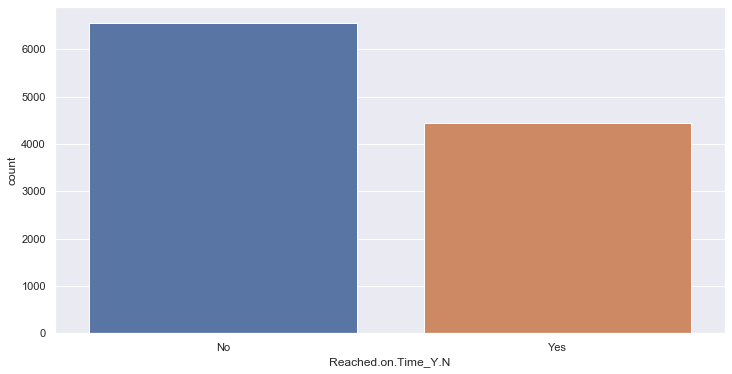

In [17]:
sns.set(rc={'figure.figsize':(12,6)})
sns.countplot(x='Reached.on.Time_Y.N',data=train_df)

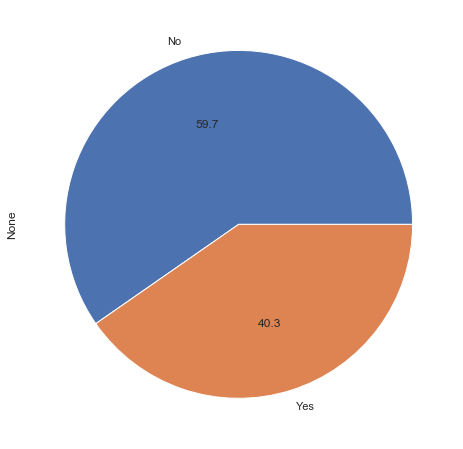

In [18]:
train_df.groupby('Reached.on.Time_Y.N').size().plot(kind='pie',autopct='%0.1f',figsize=(8,8))

#### Not Reached On Time:40.33% of the dataset  
#### Reached on Time :59.67% of the dataset

#### so the data set is almost balanced,if you order something then there is 59.67% chance that it will not reach on time

### Problem Statement
* They also want to know,if their shipments are reaching on time to their best customers who have a:
* Good Customer rating.
* Good Customer score.
* Make recurring orders.
* Highest payment buyers.

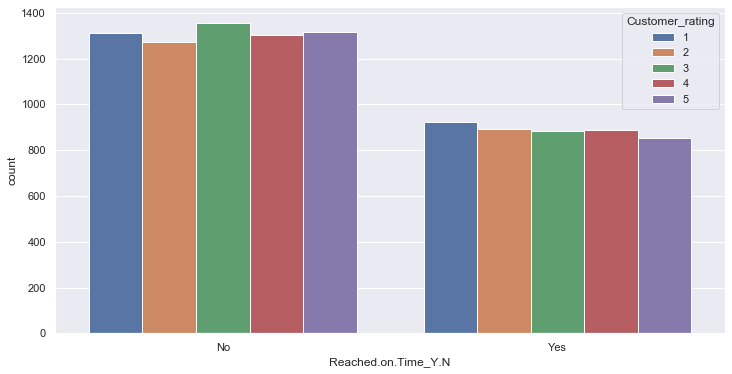

In [20]:
sns.set(rc={'figure.figsize':(12,6)})
sns.countplot(x='Reached.on.Time_Y.N',hue='Customer_rating',data=train_df)

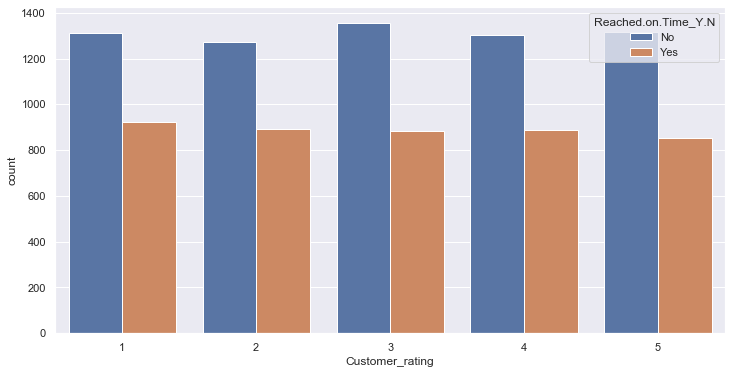

In [21]:
sns.set(rc={'figure.figsize':(12,6)})
sns.countplot(x='Customer_rating',hue='Reached.on.Time_Y.N',data=train_df)

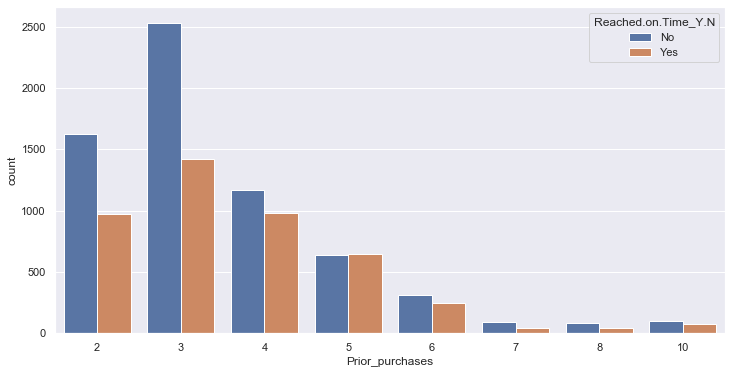

In [22]:
sns.set(rc={'figure.figsize':(12,6)})
sns.countplot(x='Prior_purchases',hue='Reached.on.Time_Y.N',data=train_df)

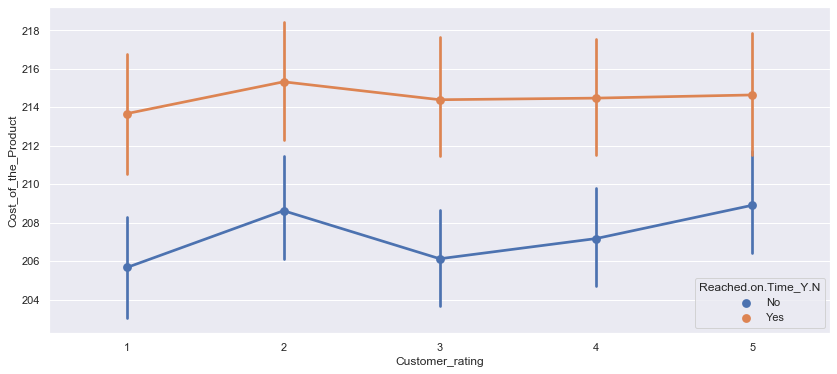

In [23]:
plt.figure(figsize=(14,6))

sns.pointplot(x='Customer_rating',y='Cost_of_the_Product',hue='Reached.on.Time_Y.N',data=train_df)


### Same lineplot as above only extra customization.

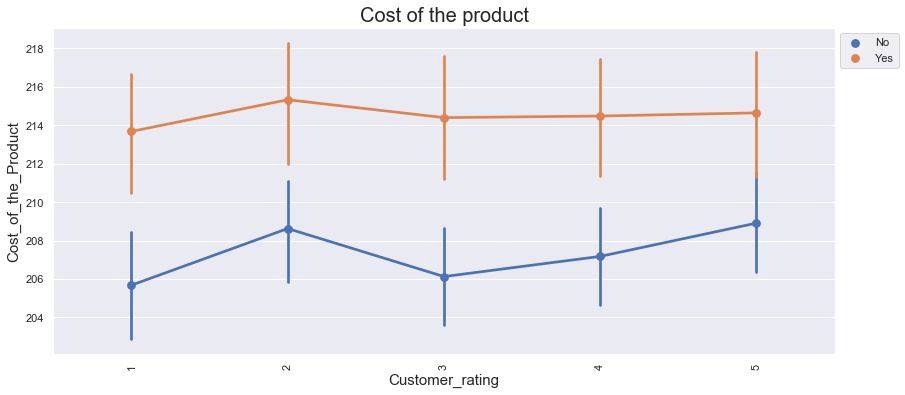

In [24]:
plt.figure(figsize=(14,6))

g=sns.pointplot(x='Customer_rating',y='Cost_of_the_Product',hue='Reached.on.Time_Y.N',data=train_df)

g.set_xticklabels(g.get_xticklabels(),rotation=90)

g.set_xlabel("Customer_rating",fontsize=15)
g.set_ylabel("Cost_of_the_Product",fontsize=15)

g.set_title("Cost of the product",fontsize=20)
plt.legend(bbox_to_anchor=(1,1),loc=2,borderaxespad=0.5)
plt.show()

#### product with high cost are delivered to the customer on time

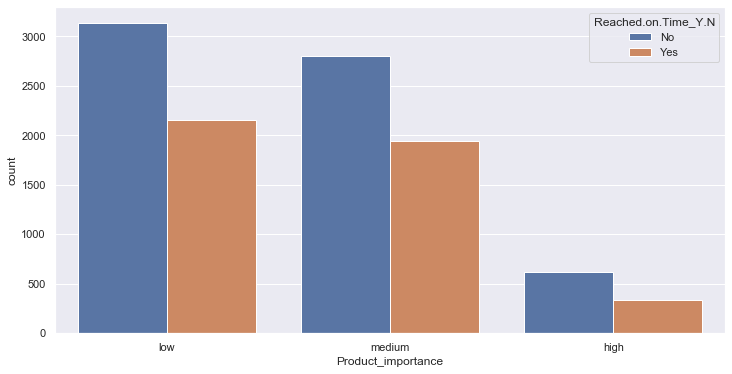

In [25]:
sns.set(rc={'figure.figsize':(12,6)})
sns.countplot(x='Product_importance',hue='Reached.on.Time_Y.N',data=train_df)

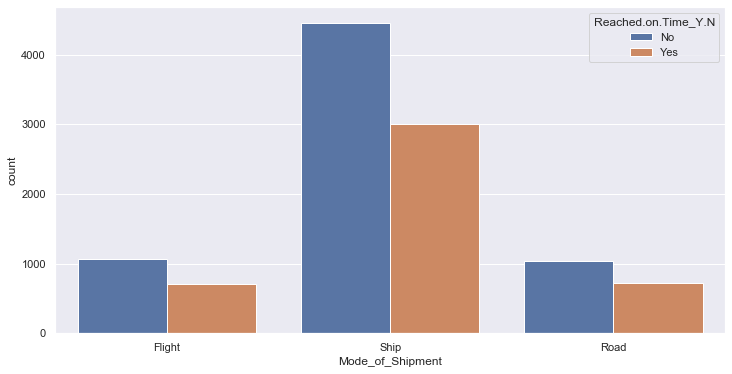

In [26]:
sns.set(rc={'figure.figsize':(12,6)})
sns.countplot(x='Mode_of_Shipment',hue='Reached.on.Time_Y.N',data=train_df)

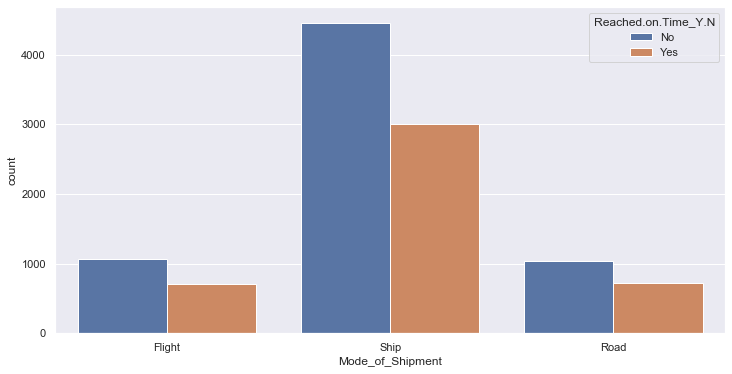

In [27]:
sns.set(rc={'figure.figsize':(12,6)})
sns.countplot(x='Mode_of_Shipment',hue='Reached.on.Time_Y.N',data=train_df)

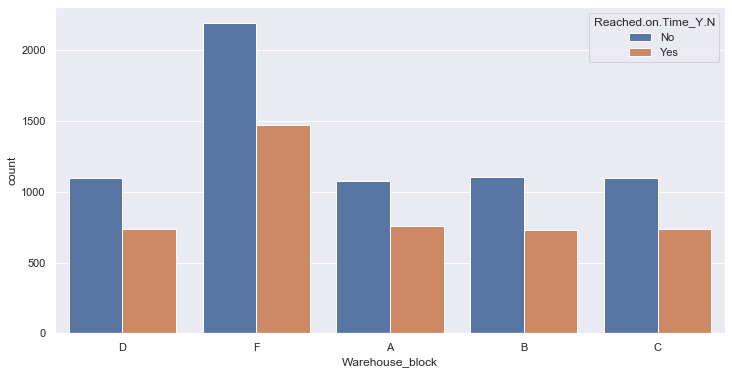

In [28]:
sns.set(rc={'figure.figsize':(12,6)})
sns.countplot(x='Warehouse_block',hue='Reached.on.Time_Y.N',data=train_df)

### Box-Plot

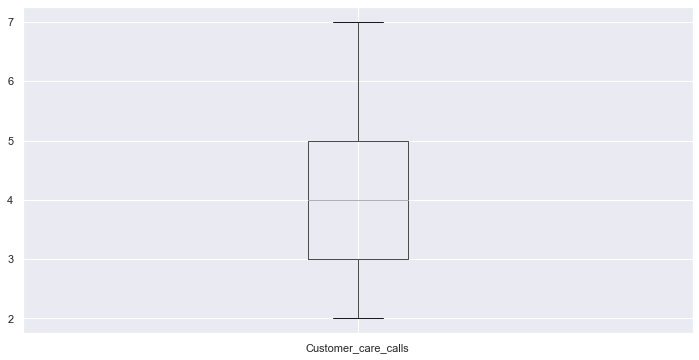

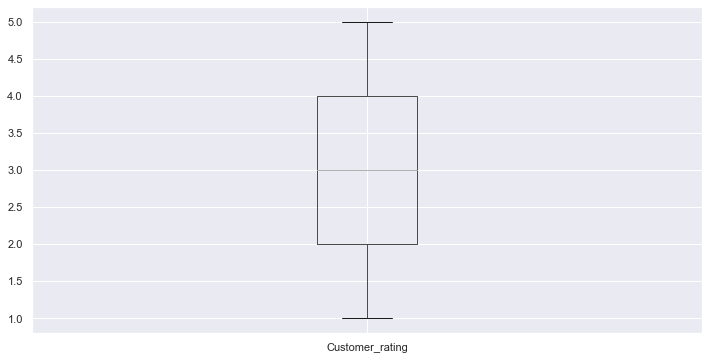

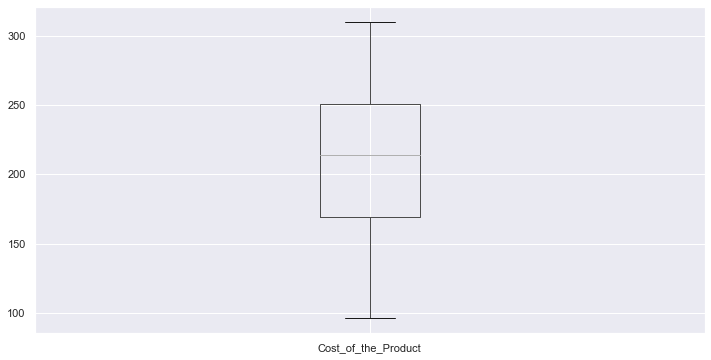

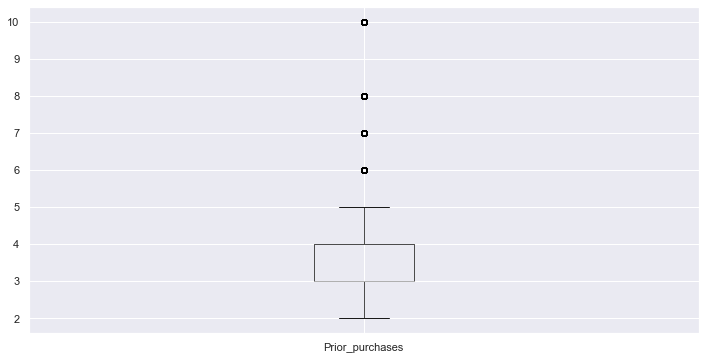

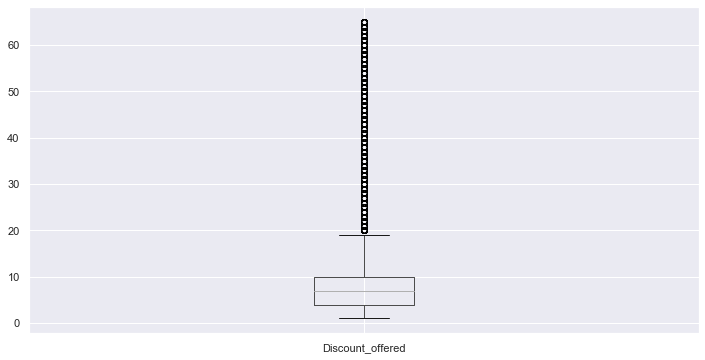

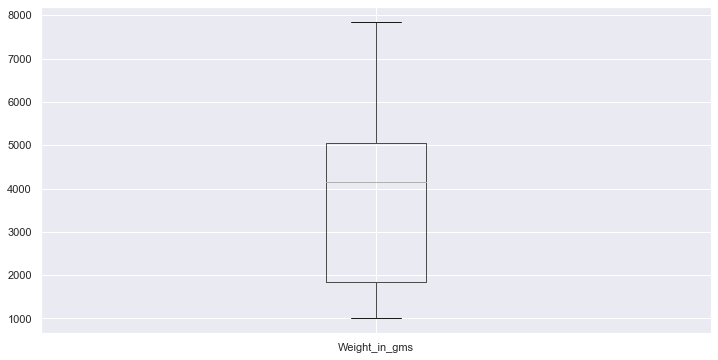

In [29]:
for column in train_df.columns:
    if train_df[column].dtype !=object:
        train_df.boxplot(column)
        plt.show()

#### two variable prior purchase and discounted offers has outlier present

### Corelation

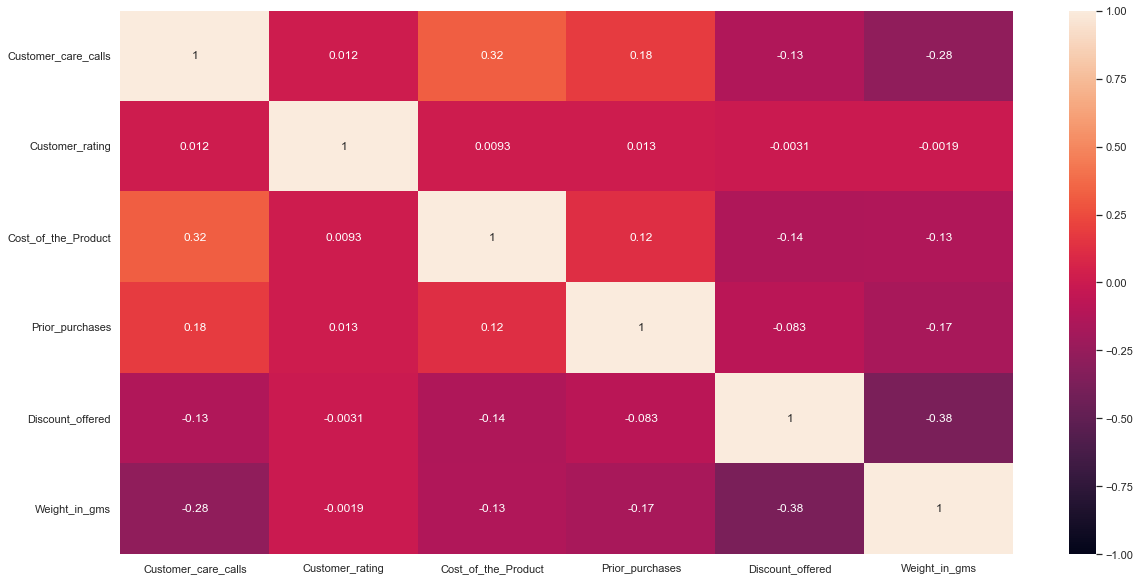

In [30]:
# Using Pearson Correlation

plt.figure(figsize=(20,10))
cor=train_df.corr()
sns.heatmap(cor,annot=True,vmax=1.0,vmin=-1.0)
plt.show()

### Data Preprocessing

In [31]:
for i in train_df.columns:
    print("#####  "  ,i ,"#####")
    print(train_df[i].value_counts())
    print()

#####   Warehouse_block #####
F    3666
D    1834
A    1833
C    1833
B    1833
Name: Warehouse_block, dtype: int64

#####   Mode_of_Shipment #####
Ship      7462
Flight    1777
Road      1760
Name: Mode_of_Shipment, dtype: int64

#####   Customer_care_calls #####
4    3557
3    3217
5    2328
6    1013
2     638
7     246
Name: Customer_care_calls, dtype: int64

#####   Customer_rating #####
3    2239
1    2235
4    2189
5    2171
2    2165
Name: Customer_rating, dtype: int64

#####   Cost_of_the_Product #####
245    110
257    109
260    106
254    101
264    100
      ... 
99       5
107      5
120      5
96       5
122      4
Name: Cost_of_the_Product, Length: 215, dtype: int64

#####   Prior_purchases #####
3     3955
2     2599
4     2155
5     1287
6      561
10     178
7      136
8      128
Name: Prior_purchases, dtype: int64

#####   Product_importance #####
low       5297
medium    4754
high       948
Name: Product_importance, dtype: int64

#####   Gender #####
F    5545
M   

### Manual Label Encoding

In [32]:
#Reached.On.Time
train_df['Reached.on.Time_Y.N'].value_counts()

No     6563
Yes    4436
Name: Reached.on.Time_Y.N, dtype: int64

In [33]:
train_df['Reached.on.Time_Y.N']=train_df['Reached.on.Time_Y.N'].map({"Yes":1,"No":0})

In [34]:
#warehouse Block
train_df['Warehouse_block'].value_counts()

F    3666
D    1834
A    1833
C    1833
B    1833
Name: Warehouse_block, dtype: int64

In [35]:
wb={"A":1,"B":2,"C":3,"D":4,"F":5}

In [36]:
#Label Encoding for warehouse block on train and test data
train_df['Warehouse_block']=train_df['Warehouse_block'].map(wb)
test_df['Warehouse_block']=test_df['Warehouse_block'].map(wb)

In [37]:
#mode of shipment 
train_df["Mode_of_Shipment"].value_counts()

Ship      7462
Flight    1777
Road      1760
Name: Mode_of_Shipment, dtype: int64

In [38]:
ms={"Ship":1,"Flight":2,"Road":3}

In [39]:
#Label Encoding for Mode_of_shipment block on train and test data
train_df['Mode_of_Shipment']=train_df['Mode_of_Shipment'].map(ms)
test_df['Mode_of_Shipment']=test_df['Mode_of_Shipment'].map(ms)

In [40]:
#Product Importance
train_df['Product_importance'].value_counts()

low       5297
medium    4754
high       948
Name: Product_importance, dtype: int64

In [41]:
pi={"low":1,"medium":2,"high":3}

In [42]:
#Label Encoding for Product_importance block on train and test data
train_df['Product_importance']=train_df['Product_importance'].map(pi)
test_df['Product_importance']=test_df['Product_importance'].map(pi)

In [43]:
#Gender
train_df['Gender'].value_counts()

F    5545
M    5454
Name: Gender, dtype: int64

In [44]:
ge={"F":0,"M":1}

In [45]:
#Label Encoding for Gender block on train and test data
train_df['Gender']=train_df['Gender'].map(ge)
test_df['Gender']=test_df['Gender'].map(ge)

In [46]:
train_df.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,4,2,4,2,177,3,1,0,44,1233,0
1,5,2,4,5,216,2,1,1,59,3088,0
2,1,2,2,2,183,4,1,1,48,3374,0
3,2,2,3,3,176,4,2,1,10,1177,0
4,3,2,2,2,184,3,2,0,46,2484,0


#### All categorical labels are manually encoded for train and test data

### Shuffling the data

In [47]:
# shuffle the train dataset
df=train_df.sample(frac=1).reset_index(drop=True)

In [48]:
df.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,5,2,4,1,157,3,2,1,31,1712,0
1,5,2,4,4,197,3,1,0,29,2915,0
2,5,1,3,2,234,3,2,1,39,2099,0
3,4,1,3,2,214,3,2,1,1,5362,1
4,2,1,4,2,182,3,2,1,9,5735,1


### Label Split

In [49]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
    #Other way
#x=df.loc[:,df.columns !="Reached.on.Time_Y.N"]
#y=df["Reached.on.Time_Y.N"]

In [50]:
print(x.shape)
print(y.shape)

(10999, 10)
(10999,)


### Data Partition

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [53]:
print("dataframe shape {}".format(df.shape))
print()
print("x_train shape:{}".format(x_train.shape))
print("x_test shape:{}".format(x_test.shape))
print("y_train shape:{}".format(y_train.shape))
print("y_test shape:{}".format(y_test.shape))

dataframe shape (10999, 11)

x_train shape:(7369, 10)
x_test shape:(3630, 10)
y_train shape:(7369,)
y_test shape:(3630,)


### Normalization

In [54]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
# fit and transform the data
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)


In [55]:
x_train

array([[ 1.12358395, -0.6335311 , -1.79134436, ..., -0.98665439,
         1.44774472, -1.56942129],
       [ 0.45136749, -0.6335311 , -0.91772314, ..., -0.98665439,
        -0.27596856,  1.12321416],
       [-0.89306543,  0.70299643, -0.91772314, ...,  1.01352613,
        -0.33752975,  1.22562139],
       ...,
       [ 1.12358395, -0.6335311 , -1.79134436, ..., -0.98665439,
        -0.64533569, -1.40139986],
       [ 1.12358395, -0.6335311 , -0.04410193, ..., -0.98665439,
        -0.46065212,  0.99811791],
       [-0.22084897, -0.6335311 , -0.91772314, ...,  1.01352613,
        -0.33752975,  0.93924909]])

In [56]:
x_test

array([[-0.89306543, -0.6335311 ,  0.82951929, ..., -0.98665439,
        -0.70689688,  1.41939793],
       [ 1.12358395, -0.6335311 , -0.04410193, ...,  1.01352613,
         2.43272374, -1.13832981],
       [-0.89306543, -0.6335311 ,  0.82951929, ..., -0.98665439,
        -0.27596856,  1.28571664],
       ...,
       [ 0.45136749, -0.6335311 , -0.04410193, ...,  1.01352613,
        -0.70689688,  1.1428371 ],
       [ 1.12358395,  0.70299643, -0.91772314, ...,  1.01352613,
        -0.5837745 ,  0.87731418],
       [-0.22084897,  2.03952396,  0.82951929, ...,  1.01352613,
        -0.27596856,  1.23849894]])

### Logistic Regression

In [57]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

y_pred=lr.predict(x_test) #Prediction on test data

In [58]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cmf=confusion_matrix(y_test,y_pred)   #Y_test should be always passed first or else we get up wrong matrix
print(cmf)

print("Classification report: ")

print(classification_report(y_test,y_pred))

acc=accuracy_score(y_test,y_pred)
print("Accuracy of the model: ",acc)

[[1473  641]
 [ 665  851]]
Classification report: 
              precision    recall  f1-score   support

           0       0.69      0.70      0.69      2114
           1       0.57      0.56      0.57      1516

   micro avg       0.64      0.64      0.64      3630
   macro avg       0.63      0.63      0.63      3630
weighted avg       0.64      0.64      0.64      3630

Accuracy of the model:  0.6402203856749311


### Using SVM

In [59]:
from sklearn.svm import SVC
svc_model=SVC(kernel='rbf',C=1,gamma=0.01)
svc_model.fit(x_train, y_train)
Y_pred=svc_model.predict(x_test)
#print(list(Y_pred))

In [60]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cmf=confusion_matrix(y_test,y_pred)   #Y_test should be always passed first or else we get up wrong matrix
print(cmf)

print("Classification report: ")

print(classification_report(y_test,y_pred))

acc=accuracy_score(y_test,y_pred)
print("Accuracy of the model: ",acc)

[[1473  641]
 [ 665  851]]
Classification report: 
              precision    recall  f1-score   support

           0       0.69      0.70      0.69      2114
           1       0.57      0.56      0.57      1516

   micro avg       0.64      0.64      0.64      3630
   macro avg       0.63      0.63      0.63      3630
weighted avg       0.64      0.64      0.64      3630

Accuracy of the model:  0.6402203856749311


In [65]:
from sklearn.tree import DecisionTreeClassifier
model_DecisionTree=DecisionTreeClassifier(criterion='gini',random_state=10)

#fit the model on the data and predict the values
model_DecisionTree.fit(x_train,y_train)

#Predict
Y_pred=model_DecisionTree.predict(x_test)
print(Y_pred)

[1 0 0 ... 1 1 1]


In [66]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[1473  641]
 [ 665  851]]
0.6402203856749311
              precision    recall  f1-score   support

           0       0.69      0.70      0.69      2114
           1       0.57      0.56      0.57      1516

   micro avg       0.64      0.64      0.64      3630
   macro avg       0.63      0.63      0.63      3630
weighted avg       0.64      0.64      0.64      3630



#### Every model is showing approx same result